In [173]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import math
from scipy.optimize import curve_fit

<a href="https://ibb.co/cbMzsVJ"><img src="https://i.ibb.co/1shH4jZ/Captura.png" alt="Captura" border="0"></a>

<a href="https://ibb.co/p0T64nz"><img src="https://i.ibb.co/6nScDNP/Captura.png" alt="Captura" border="0"></a>



In [174]:
#Calcular la distribución binomial
def dbinom(w,n,p):
  return np.math.factorial(n)/(np.math.factorial(w)*(np.math.factorial(abs(n-w))))*p**w*(1-p)**(n-w)
#Funciones para hacer el ajuste lineal
def func(x, a, b, c):
     return a * np.exp(-b * x) + c #Ajuste tipo exponencial
     
def func(x, a, b, c, d, e, f, g, h):
    return a*x**7 + b*x**6 +c*x**5 + d*x**4+e*x**3+g*x**2+h*x**1+f #Ajuste tipo exponencial
def func(x,g,h,f):
    return g*x**2+h*x**1+f #Ajuste tipo exponencial

#Calcular la probalbilidad
def posterior(w,n,p):
  prior=np.zeros(len(p))+1
  likelihood =dbinom( w ,n, p)
  # compute product of likelihood and prior
  unstd_posterior = likelihood * prior
  # standardize the posterior, so it sums to 1
  return  unstd_posterior / sum(unstd_posterior)

#plt.plot(b)
(dbinom(6,9,0.5))

0.1640625

In [175]:
Dat=np.array(['W','L','W','W','W','L','W','L','W'])

w=6 # es el evento, en este caso que obtengamos agua
n=len(Dat) # Tamaño del espacio muestral
p=np.linspace(0,0.9991,20) # Probabilidad


Text(0, 0.5, 'posterior probability')

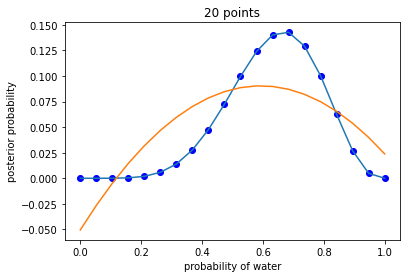

In [176]:
popt, pcov = curve_fit(func, p, posterior(w,n,p))
plt.plot( p , posterior(w,n,p) , "bo" )
plt.plot( p , posterior(w,n,p) , "" )
plt.plot(p,func(p, *popt))
plt.title( "20 points" )
plt.xlabel("probability of water")
plt.ylabel('posterior probability')


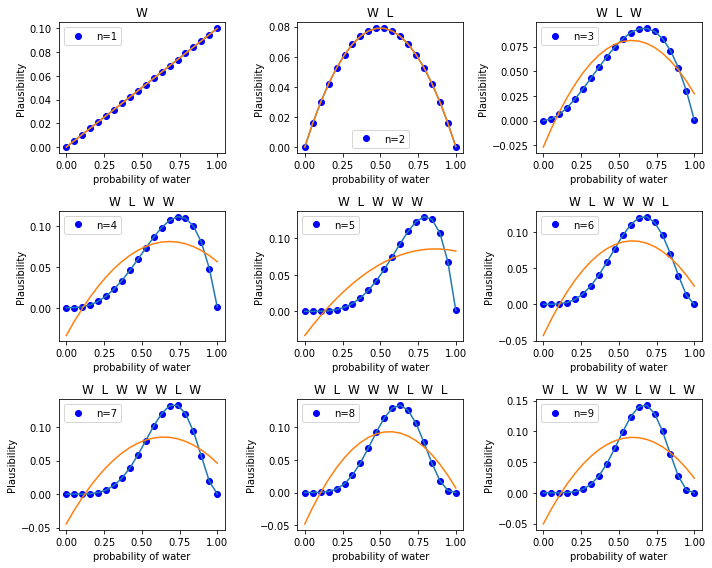

In [177]:
w=0
#Gráfica de los datos
fig, axes = plt.subplots(nrows=3, ncols=3,figsize=(10, 8))
for i, ax in enumerate(axes.flat, start=1):
    if str(Dat[i-1])=='W':
      w=w+1
    popt, pcov = curve_fit(func, p, posterior(w,i,p))
    ax.plot( p , posterior(w,i,p) , "bo", label="n="+str(i) )
    ax.plot( p , posterior(w,i,p) , "" )
    ax.plot(p,func(p, *popt))
    ax.set_title("  ".join(Dat))
    ax.set_title("  ".join(Dat[:i]))
    ax.set_xlabel('probability of water')
    ax.set_ylabel('Plausibility')
    ax.legend()
fig.tight_layout()

plt.show()